### Imports

In [1]:
import pandas as pd
from missingpy import KNNImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
import cufflinks as cf
cf.go_offline()

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
application_data=pd.read_csv('application_data.csv')

In [3]:
previous_data=pd.read_csv('previous_application.csv')

In [4]:
des=pd.read_csv('columns_description.csv',encoding="ISO-8859-1")

In [5]:
#Getting Info
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#Getting Columns
print(application_data.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [8]:
len(application_data)

307511

In [9]:
#Printing Null Values for every column
for col in application_data:
    print(col,application_data[col].isna().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

There are lot of columns with null values

In [10]:
#Analysing Null Columns
#application_data.dropna(inplace=True)

In [11]:
application_data.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [12]:
#Checking length
len(application_data)

307511

In [13]:
#Calculating mean for AMT_REQ_CREDIT_BUREAU_HOUR
data_mean=int(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean())

In [14]:
#Imputing Mean in the place of null values for AMT_REQ_CREDIT_BUREAU_HOUR
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].replace(np.nan,data_mean,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

In [15]:
data_mean=int(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean())

In [16]:
data_mean

0

In [17]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].replace(np.nan,data_mean,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

In [18]:
data_mean=int(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mean())

In [19]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan,data_mean,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

In [20]:
data_mean=int(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean())

In [21]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan,data_mean,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

In [22]:
data_mean=int(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean())

In [23]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].replace(np.nan,data_mean,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

In [24]:
data_mean=int(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())

In [25]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan,data_mean,inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [26]:
#Printing Null Values for every column
for col in application_data:
    print(col,application_data[col].isna().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

In [27]:
col=['ELEVATORS_MEDI','COMMONAREA_AVG','FLOORSMIN_AVG','COMMONAREA_MEDI','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','YEARS_BUILD_MODE','NONLIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI','YEARS_BUILD_AVG','ELEVATORS_MODE','ENTRANCES_MODE','LIVINGAREA_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','COMMONAREA_MODE','ELEVATORS_AVG','LANDAREA_AVG','BASEMENTAREA_AVG','EXT_SOURCE_1','BASEMENTAREA_MODE','LANDAREA_MEDI','ENTRANCES_AVG','APARTMENTS_AVG','FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMIN_MODE','NONLIVINGAREA_MEDI','LANDAREA_MODE','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI','BASEMENTAREA_MEDI','YEARS_BUILD_MEDI','TOTALAREA_MODE','OWN_CAR_AGE','NONLIVINGAREA_MODE','LIVINGAREA_MODE','APARTMENTS_MODE','APARTMENTS_MEDI','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_3','EXT_SOURCE_2']
for c in col:
    cal_mean=application_data[c].mean()
    application_data[c].replace(np.nan,cal_mean,inplace=True)

<b>Imputing Mean to preserve most of the features as deleting the row leads to reduction of more than half population

In [28]:
#To drop OWN CAR AGE
application_data['APARTMENTS_MEDI'].mean()

0.11784992076621095

In [29]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.000000      164666
1.000000       48870
2.000000       29766
3.000000       20215
4.000000       13946
5.000000        9463
6.000000        6349
7.000000        4344
8.000000        2886
9.000000        1959
10.000000       1335
1.405292        1021
11.000000        837
12.000000        620
13.000000        401
14.000000        238
15.000000        166
16.000000        137
17.000000         73
18.000000         49
19.000000         44
20.000000         30
21.000000         28
22.000000         20
23.000000         13
24.000000         12
25.000000         11
27.000000          5
29.000000          2
30.000000          1
344.000000         1
47.000000          1
28.000000          1
26.000000          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [30]:
#Effect of Impute
#Printing Null Values for every column
for col in application_data:
    print(col,application_data[col].isna().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 0
EXT_SOURCE_2 0
EXT_SOURCE_3 0
APARTMENTS_AVG 0
BASEMENTAREA_AVG 0
YEARS_BEGINEXPLUATATION_AVG 0
YEARS_BUILD_AVG 0
COMMONAREA_AVG 0
ELEVATORS_AVG 0
ENTRANCES_AVG 0
FLOORSMAX_AV

In [31]:
#to Delete columns or check
#FONDKAPREMONT_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, HOUSETYPE_MODE

In [32]:
#application_data.dropna(inplace=True)

In [33]:
len(application_data)

307511

In [34]:
previous_data.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [35]:
len(previous_data.columns)

37

In [36]:
previous_data.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [37]:
previous_data['AMT_CREDIT'].value_counts()

0.000          336768
45000.000       35051
225000.000      21094
450000.000      19954
135000.000      18720
180000.000      17085
90000.000       13781
270000.000       9842
900000.000       7432
67500.000        7245
95940.000        6449
143910.000       6386
157500.000       6237
112500.000       5938
675000.000       5348
239850.000       5229
254700.000       4863
765000.000       4779
71955.000        4530
47970.000        4508
512370.000       3802
491580.000       3800
360000.000       3781
1350000.000      3763
202500.000       3761
337500.000       3672
46485.000        3577
152820.000       3464
191880.000       3316
533160.000       3313
                ...  
220167.000          1
365665.500          1
1682046.000         1
365683.500          1
329184.000          1
365967.000          1
220027.500          1
216143.280          1
365940.000          1
35619.705           1
365895.000          1
220054.500          1
220063.500          1
220068.000          1
220072.500

In [38]:
previous_data['RATE_INTEREST_PRIMARY'].value_counts()

0.189136    1218
0.142440     951
0.160716     821
0.193330     681
0.196900     573
0.176003     241
0.189122     210
0.160702     204
0.182818     187
0.196914     139
0.179687      74
0.193344      69
0.059135      61
0.142454      56
0.696178      47
0.142143      31
0.179701      28
0.182832      21
0.191757      17
0.127834      17
0.193316      16
0.189151      15
0.696319      12
0.700810      11
0.654511      10
0.696333       9
0.654568       8
0.141732       8
0.176017       7
0.142426       6
            ... 
0.739714       1
0.696305       1
0.902924       1
0.141959       1
0.148221       1
0.162303       1
0.700839       1
0.691800       1
0.797447       1
0.141774       1
0.181769       1
0.194052       1
0.162317       1
0.207710       1
0.173283       1
0.176074       1
0.207512       1
0.744985       1
0.815511       1
0.158421       1
0.636036       1
1.000000       1
0.141831       1
0.207526       1
0.806769       1
0.523249       1
0.207738       1
0.132764      

In [39]:
len(previous_data)

1670214

In [40]:
application_data['OCCUPATION_TYPE']

0                      Laborers
1                    Core staff
2                      Laborers
3                      Laborers
4                    Core staff
5                      Laborers
6                   Accountants
7                      Managers
8                           NaN
9                      Laborers
10                   Core staff
11                          NaN
12                     Laborers
13                      Drivers
14                     Laborers
15                     Laborers
16                      Drivers
17                     Laborers
18                     Laborers
19                   Core staff
20                     Laborers
21                  Sales staff
22                  Sales staff
23                          NaN
24                      Drivers
25               Cleaning staff
26                Cooking staff
27                     Laborers
28                          NaN
29                     Laborers
                  ...          
307481  

In [41]:
application_data['OCCUPATION_TYPE'].isna().sum()

96391

In [42]:
application_data['OCCUPATION_TYPE'].replace(np.nan,"Others",inplace=True)

In [43]:
application_data['OCCUPATION_TYPE'].value_counts()

Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [44]:
#application_data.dropna(inplace=True)

In [45]:
len(application_data)

307511

In [46]:
for col in application_data:
    print(col,application_data[col].isna().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 0
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 0
EXT_SOURCE_2 0
EXT_SOURCE_3 0
APARTMENTS_AVG 0
BASEMENTAREA_AVG 0
YEARS_BEGINEXPLUATATION_AVG 0
YEARS_BUILD_AVG 0
COMMONAREA_AVG 0
ELEVATORS_AVG 0
ENTRANCES_AVG 0
FLOORSMAX_AVG 0


In [47]:
col_list=application_data.columns.tolist()

In [48]:
#Dropping Columns
application_data.drop(["WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE","FONDKAPREMONT_MODE"], axis = 1, inplace = True) 

Dropping of the column because these are classfication variable and hence we can not impute.

In [49]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
application_data['HOUSETYPE_MODE'].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [51]:
application_data['HOUSETYPE_MODE'].replace(np.nan,"others",inplace=True)

As HOUSETYPE_MODE plays an important role, so we can not remove the column. Inorder to preserve that column we seggregated NULL values as others

In [52]:
application_data.isna().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OWN_CAR_AGE                      0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE     

In [53]:
application_data.dropna(inplace=True)

Dropping Some rows that were we can not impute

In [54]:
len(application_data)

306206

In [55]:
filtered_data=application_data.select_dtypes(exclude='object')

In [56]:
corr_data=filtered_data.corr()
corr_data.abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.002154,0.001283,0.001756,0.000209,0.000252,0.000220,0.000991,0.001580,0.001392,...,0.000065,0.000357,0.000683,0.000350,0.002549,0.002320,0.001834,0.000503,0.000732,0.003945
TARGET,0.002154,1.000000,0.019270,0.003920,0.030311,0.012814,0.039583,0.037247,0.078575,0.045067,...,0.007818,0.001578,0.000428,0.003850,0.000121,0.001809,0.001270,0.014855,0.005822,0.011998
CNT_CHILDREN,0.001283,0.019270,1.000000,0.012894,0.002087,0.021478,0.002031,0.025632,0.331193,0.239870,...,0.003238,0.000572,0.001024,0.002520,0.000429,0.000348,0.000898,0.008073,0.004787,0.034984
AMT_INCOME_TOTAL,0.001756,0.003920,0.012894,1.000000,0.156150,0.191061,0.159047,0.074502,0.027173,0.064089,...,0.003044,0.002432,0.000352,0.000543,0.001530,0.003514,0.003887,0.026615,0.007938,0.015927
AMT_CREDIT,0.000209,0.030311,0.002087,0.156150,1.000000,0.769938,0.986975,0.099481,0.056320,0.066043,...,0.033796,0.020745,0.029989,0.016019,0.002160,0.004660,0.001352,0.055332,0.020633,0.035801
AMT_ANNUITY,0.000252,0.012814,0.021478,0.191061,0.769938,1.000000,0.775089,0.118176,0.009497,0.104056,...,0.009634,0.004571,0.011175,0.017436,0.004077,0.002102,0.013268,0.036902,0.010780,0.008212
AMT_GOODS_PRICE,0.000220,0.039583,0.002031,0.159047,0.986975,0.775089,1.000000,0.103402,0.054607,0.063887,...,0.032379,0.019948,0.030619,0.014509,0.001530,0.005087,0.001602,0.057211,0.021069,0.038088
REGION_POPULATION_RELATIVE,0.000991,0.037247,0.025632,0.074502,0.099481,0.118176,0.103402,1.000000,0.029585,0.004177,...,0.013355,0.002877,0.000323,0.003362,0.002366,0.000918,0.002523,0.071441,0.001736,0.000063
DAYS_BIRTH,0.001580,0.078575,0.331193,0.027173,0.056320,0.009497,0.054607,0.029585,1.000000,0.615745,...,0.043610,0.002969,0.008425,0.027113,0.003920,0.001396,0.003883,0.003560,0.016192,0.072878
DAYS_EMPLOYED,0.001392,0.045067,0.239870,0.064089,0.066043,0.104056,0.063887,0.004177,0.615745,1.000000,...,0.039528,0.009791,0.009984,0.008334,0.004819,0.000242,0.002588,0.032470,0.013412,0.044637


In [57]:
#corr_data.to_csv()

In [58]:
corr_data[corr_data>0.9]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,NaN,NaN,NaN,NaN,1.000000,NaN,0.986975,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,0.986975,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
corr_mat=filtered_data.corr().abs()

In [60]:
upper=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))

In [61]:
#Setting threshold to 0.95
to_drop=[column for column in upper.columns if any(upper[column]>0.95)]

In [62]:
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [63]:
application_data.drop(to_drop,axis=1,inplace=True)

As application data is having large number of feature. Inorder to make the dataset simple we have find that to remove one of the column which are higly correlated. Here the threshold is 0.95

In [64]:
#Final Columns in application_data
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306206 entries, 0 to 307510
Data columns (total 87 columns):
SK_ID_CURR                     306206 non-null int64
TARGET                         306206 non-null int64
NAME_CONTRACT_TYPE             306206 non-null object
CODE_GENDER                    306206 non-null object
FLAG_OWN_CAR                   306206 non-null object
FLAG_OWN_REALTY                306206 non-null object
CNT_CHILDREN                   306206 non-null int64
AMT_INCOME_TOTAL               306206 non-null float64
AMT_CREDIT                     306206 non-null float64
AMT_ANNUITY                    306206 non-null float64
NAME_TYPE_SUITE                306206 non-null object
NAME_INCOME_TYPE               306206 non-null object
NAME_EDUCATION_TYPE            306206 non-null object
NAME_FAMILY_STATUS             306206 non-null object
NAME_HOUSING_TYPE              306206 non-null object
REGION_POPULATION_RELATIVE     306206 non-null float64
DAYS_BIRTH              

In [65]:
previous_data.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [66]:
len(previous_data)

1670214

In [67]:
#Dropping Rate Interest Primary and Rate Interest Privilaged as they have max na in their row
previous_data.drop(["RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED"], axis = 1, inplace = True) 

In [68]:
previous_data.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895844
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [69]:
previous_data.drop(['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','NAME_TYPE_SUITE','RATE_DOWN_PAYMENT','AMT_GOODS_PRICE','AMT_DOWN_PAYMENT','AMT_ANNUITY'],inplace=True,axis = 1)

In [70]:
previous_data.dropna(inplace=True)

Dropping highly correlated column as done same in application data

In [71]:
len(previous_data)

1297983

In [72]:
filtered_data_prev=previous_data.select_dtypes(exclude='object')
corr_mat_prev=filtered_data_prev.corr().abs()
upper_prev=corr_mat_prev.where(np.triu(np.ones(corr_mat_prev.shape),k=1).astype(np.bool))
to_drop_prev=[column_prev for column_prev in upper.columns if any(upper[column_prev]>0.95)]

In [73]:
corr_mat_prev=filtered_data_prev.corr().abs()

In [74]:
corr_mat_prev

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_PREV,1.000000,0.000122,0.015737,0.016594,0.001735,0.004368,0.008088,0.000407,0.015590
SK_ID_CURR,0.000122,1.000000,0.000299,0.000200,0.002573,0.000171,0.000451,0.001424,0.000032
AMT_APPLICATION,0.015737,0.000299,1.000000,0.973205,0.038982,0.014807,0.300433,0.015322,0.680630
AMT_CREDIT,0.016594,0.000200,0.973205,1.000000,0.047430,0.015996,0.305777,0.017611,0.674278
HOUR_APPR_PROCESS_START,0.001735,0.002573,0.038982,0.047430,1.000000,0.008507,0.015290,0.016064,0.055512
NFLAG_LAST_APPL_IN_DAY,0.004368,0.000171,0.014807,0.015996,0.008507,1.000000,0.004740,0.001598,0.063347
DAYS_DECISION,0.008088,0.000451,0.300433,0.305777,0.015290,0.004740,1.000000,0.009739,0.246453
SELLERPLACE_AREA,0.000407,0.001424,0.015322,0.017611,0.016064,0.001598,0.009739,1.000000,0.010646
CNT_PAYMENT,0.015590,0.000032,0.680630,0.674278,0.055512,0.063347,0.246453,0.010646,1.000000


In [75]:
upper_prev=corr_mat_prev.where(np.triu(np.ones(corr_mat_prev.shape),k=1).astype(np.bool))

In [76]:
#Setting the threshold of .95
to_drop_prev=[column_prev for column_prev in upper_prev.columns if any(upper_prev[column_prev]>0.95)]

In [77]:
#Column to be dropped
to_drop_prev

['AMT_CREDIT']

In [78]:
previous_data.drop(to_drop_prev,axis=1,inplace=True)

In [79]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297983 entries, 0 to 1670213
Data columns (total 23 columns):
SK_ID_PREV                     1297983 non-null int64
SK_ID_CURR                     1297983 non-null int64
NAME_CONTRACT_TYPE             1297983 non-null object
AMT_APPLICATION                1297983 non-null float64
WEEKDAY_APPR_PROCESS_START     1297983 non-null object
HOUR_APPR_PROCESS_START        1297983 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1297983 non-null object
NFLAG_LAST_APPL_IN_DAY         1297983 non-null int64
NAME_CASH_LOAN_PURPOSE         1297983 non-null object
NAME_CONTRACT_STATUS           1297983 non-null object
DAYS_DECISION                  1297983 non-null int64
NAME_PAYMENT_TYPE              1297983 non-null object
CODE_REJECT_REASON             1297983 non-null object
NAME_CLIENT_TYPE               1297983 non-null object
NAME_GOODS_CATEGORY            1297983 non-null object
NAME_PORTFOLIO                 1297983 non-null object
NAME_PRODUC

### Finding Outliers

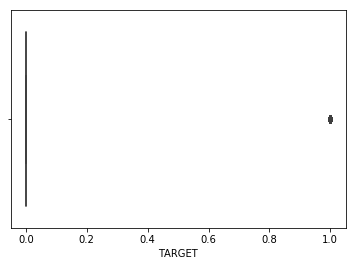

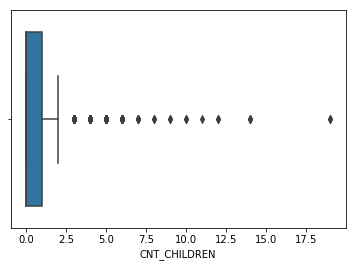

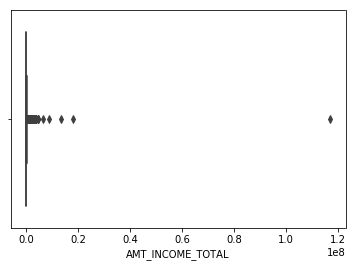

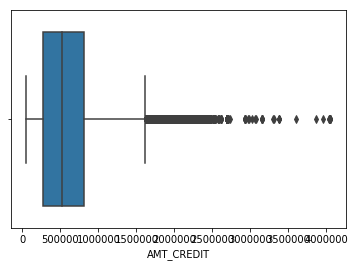

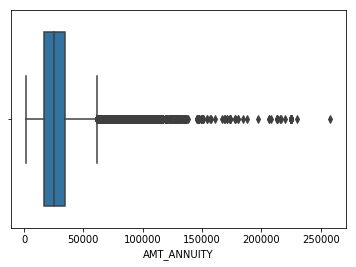

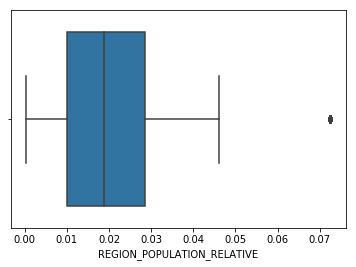

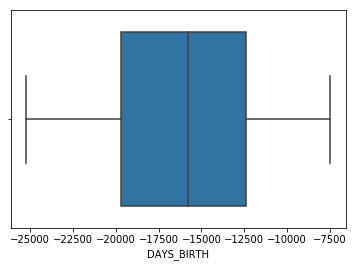

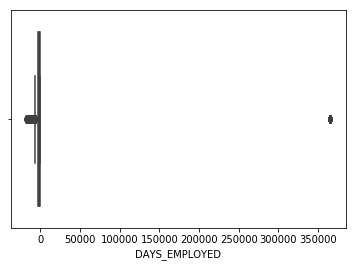

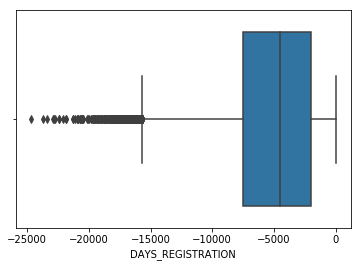

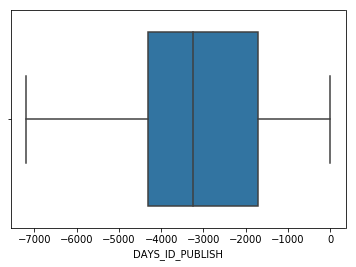

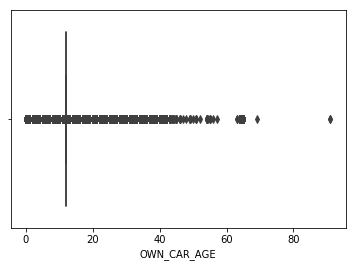

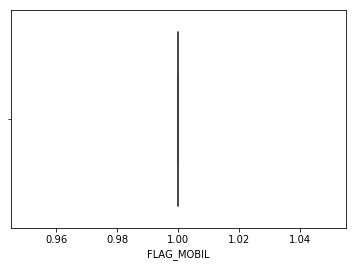

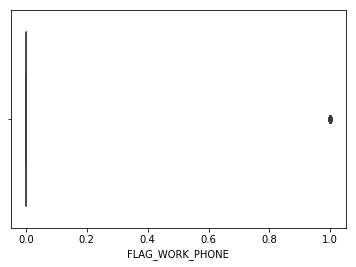

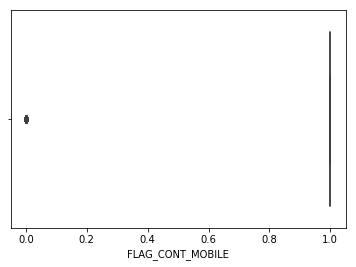

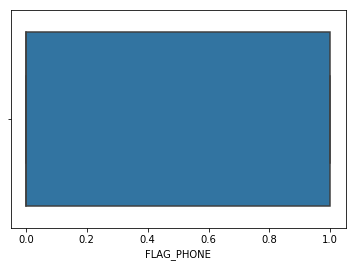

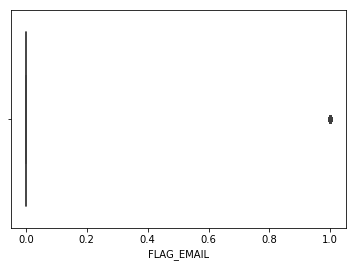

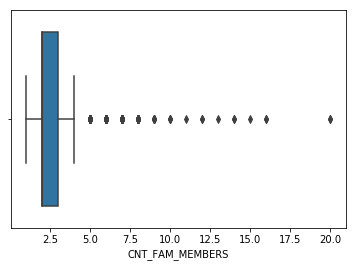

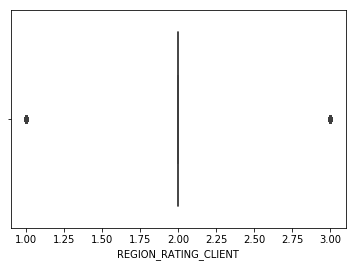

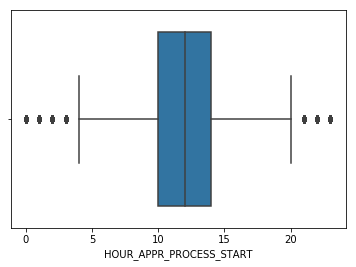

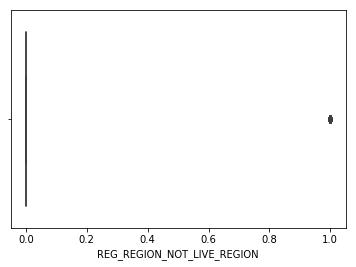

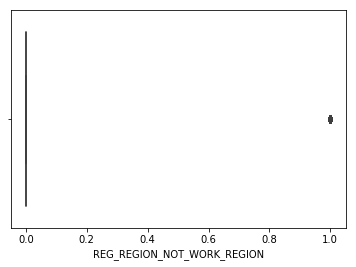

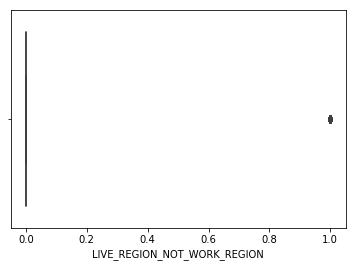

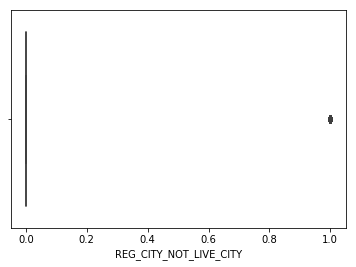

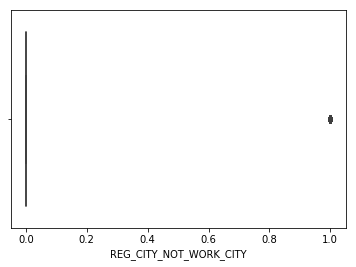

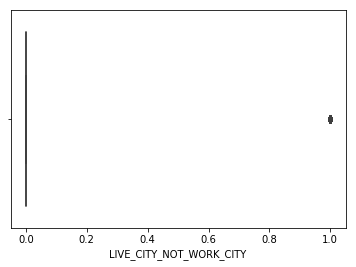

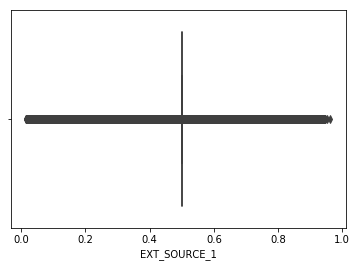

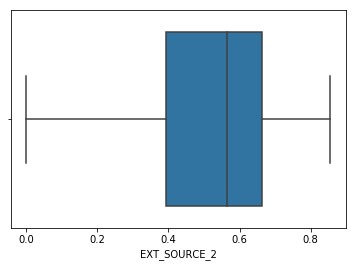

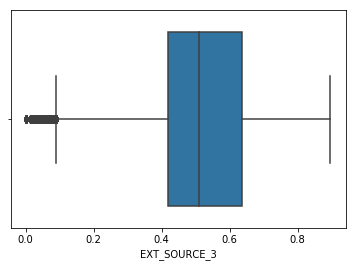

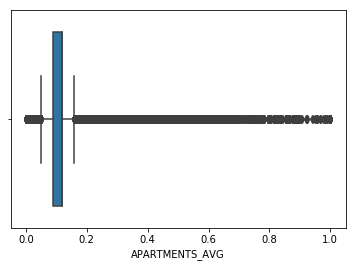

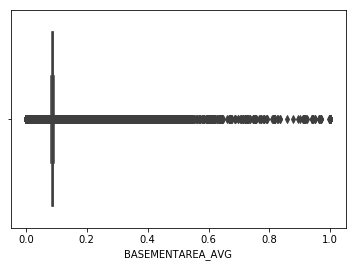

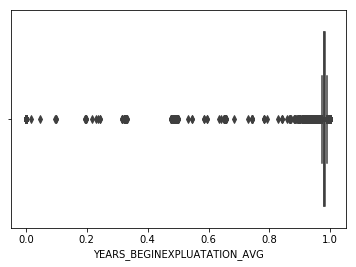

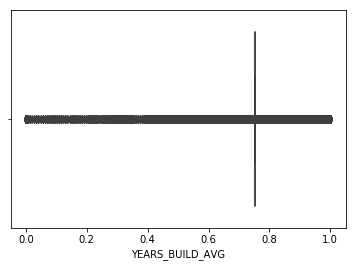

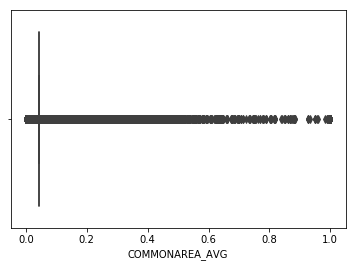

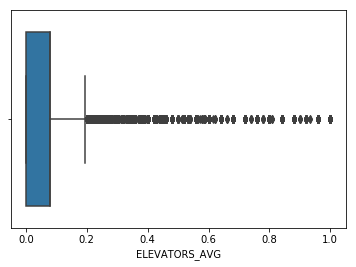

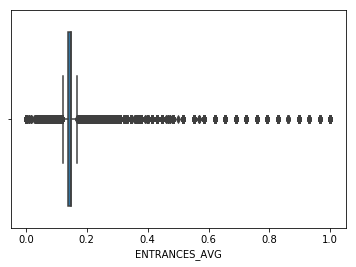

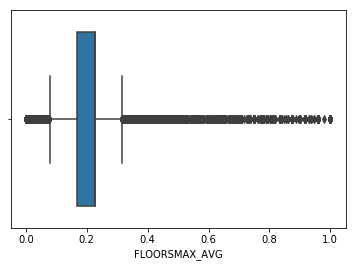

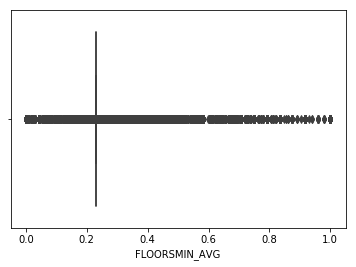

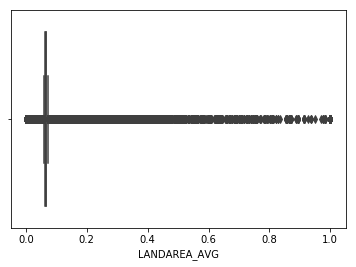

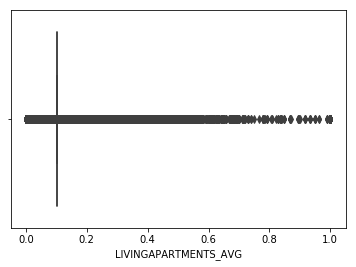

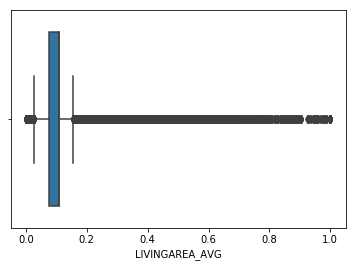

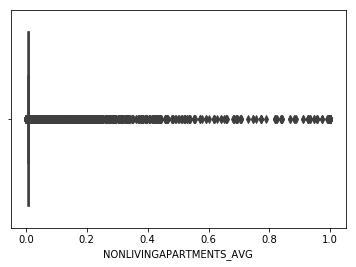

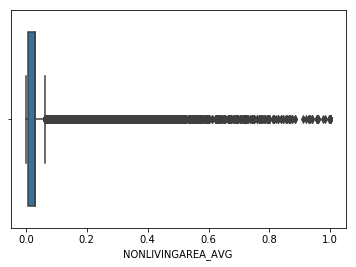

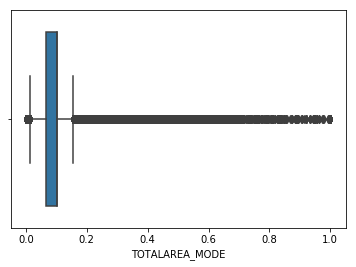

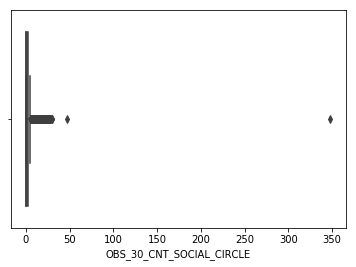

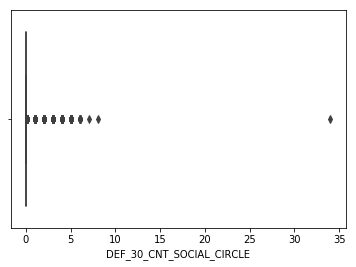

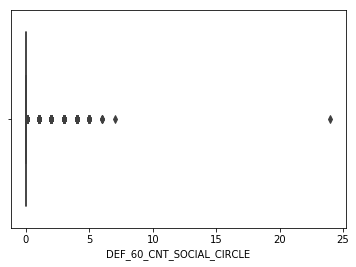

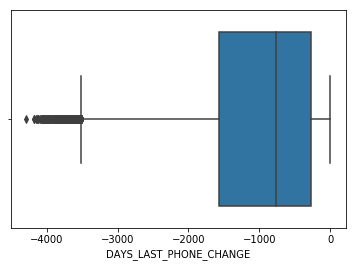

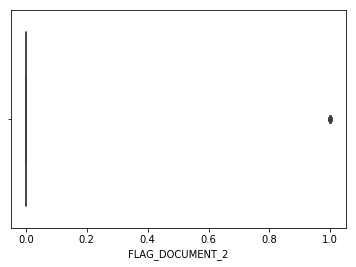

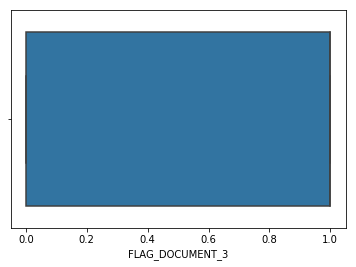

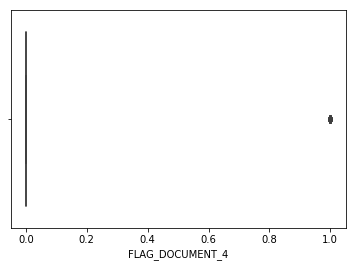

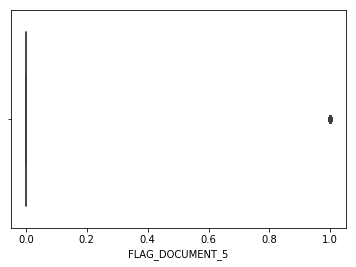

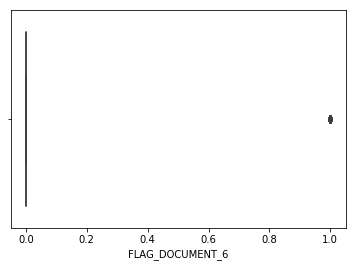

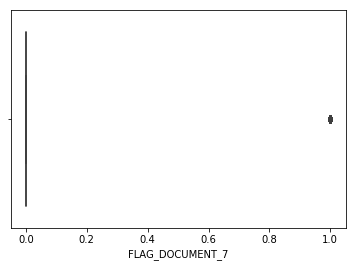

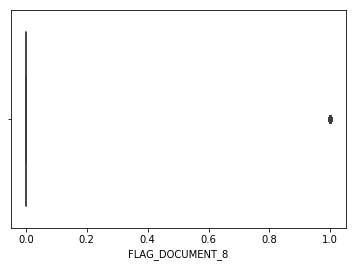

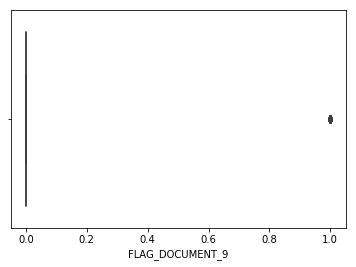

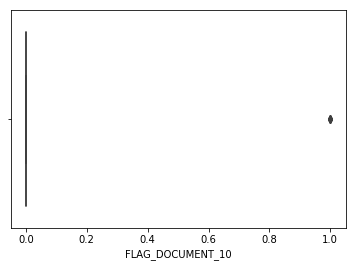

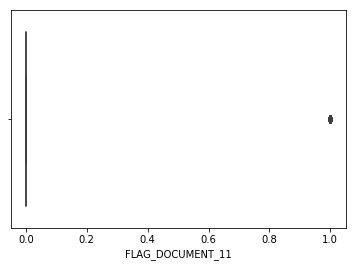

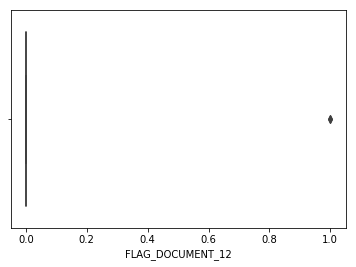

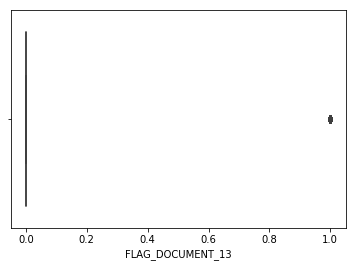

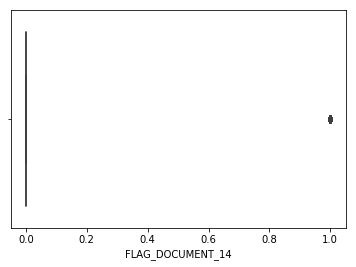

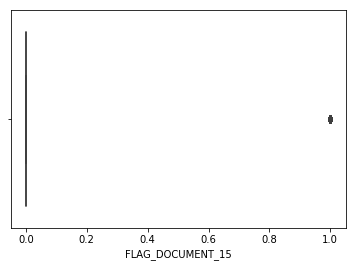

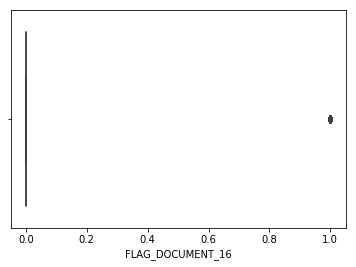

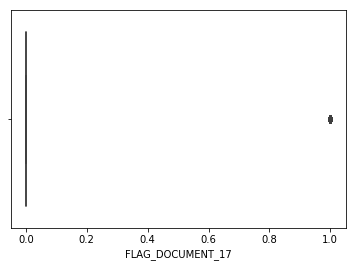

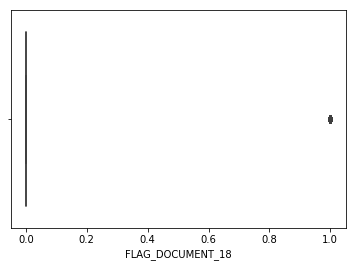

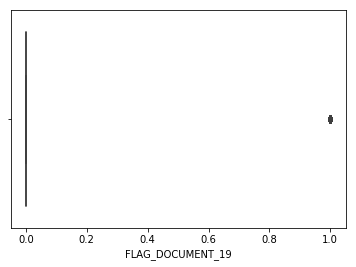

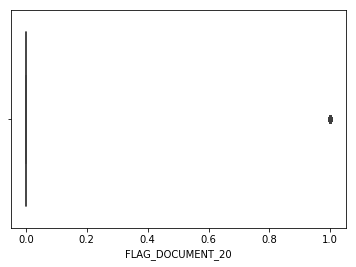

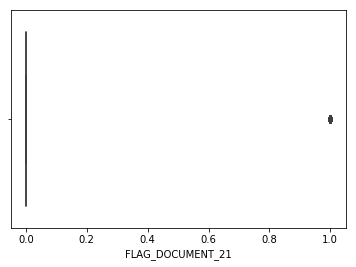

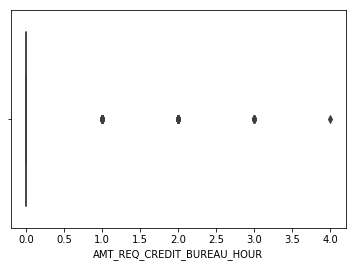

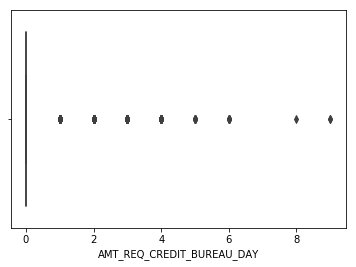

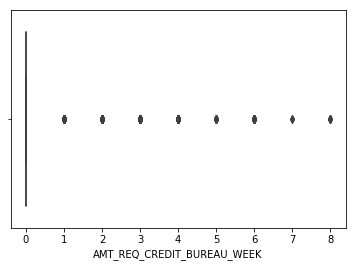

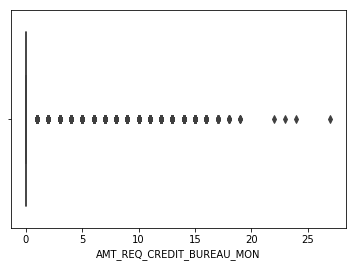

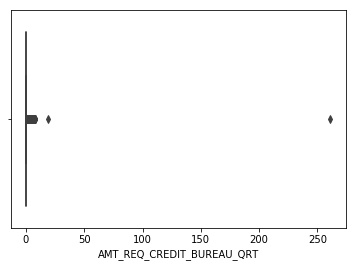

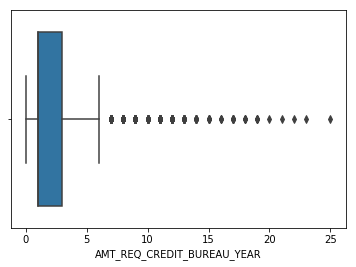

In [80]:
for col in application_data.iloc[:,1:]:
    if application_data[col].dtype=='object' or application_data[col].dtype=='O':
        continue
    else:
        sns.boxplot(application_data[col])
        plt.show()

As we can see that maximum columns is having Outliers.

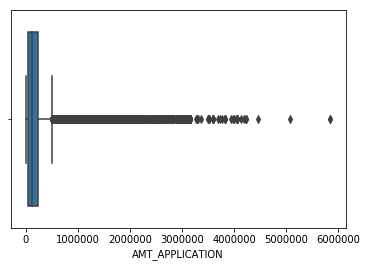

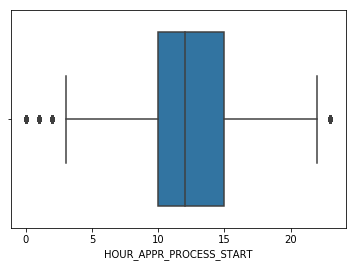

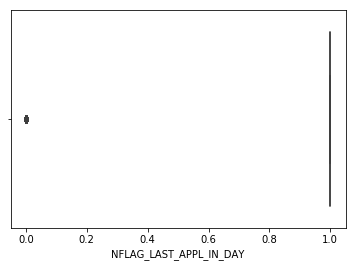

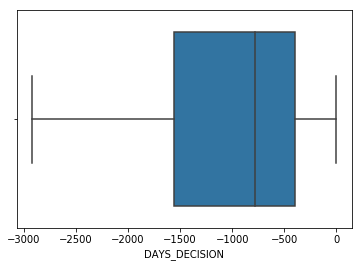

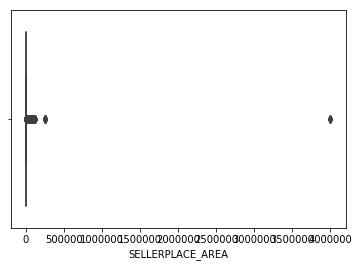

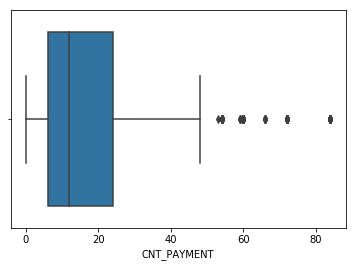

In [81]:
#For Previous Application Dataset
for col in previous_data.iloc[:,3:]:
    if previous_data[col].dtype=='object' or previous_data[col].dtype=='O':
        continue
    else:
        sns.boxplot(previous_data[col])
        plt.show()

As we can see that maximum columns is having Outliers.

In [82]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Data Imbalance Check

In [83]:
defaulter=(application_data['TARGET']==1).sum()

In [84]:
non_defaulter=(application_data['TARGET']==0).sum()

In [85]:
tot=len(application_data)

In [86]:
default_per=(defaulter/tot)*100
print(round(default_per,2))

8.08


In [87]:
non_defaulter_per=(non_defaulter/tot)*100
print(round(non_defaulter_per,2))

91.92


This is impbalance dataset. <B> Ratio is 8.08 [Defaulter]:91.92 [Non Defaulter]

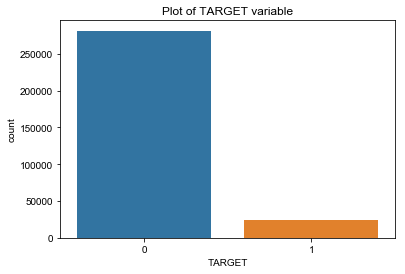

In [88]:
#Clearly form above results, we can see that the target varaible is imbalance.
sns.countplot(application_data['TARGET'])
sns.set(style="darkgrid")
plt.title('Plot of TARGET variable')
plt.show()

### Analysis 1

In [89]:
defaulter_data=application_data[application_data['TARGET']==1]

In [90]:
non_defaulter_data=application_data[application_data['TARGET']==0]

In [91]:
defaulter_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
non_defaulter_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


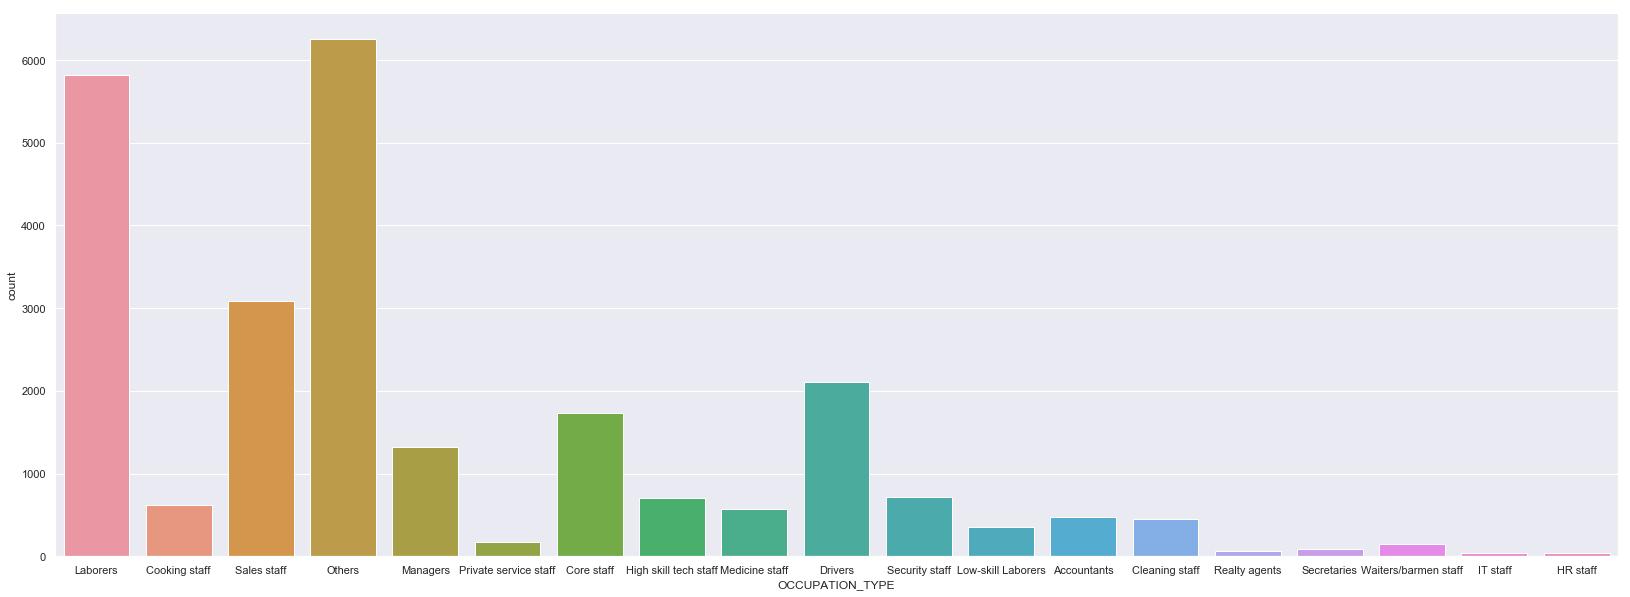

In [93]:
plt.figure(figsize=(28, 10))
sns.countplot(defaulter_data['OCCUPATION_TYPE'])
plt.show()

Clearly we can,apart from others which we have labelled to preserve the feature, labours class is having highest default followed by Sales Saff 

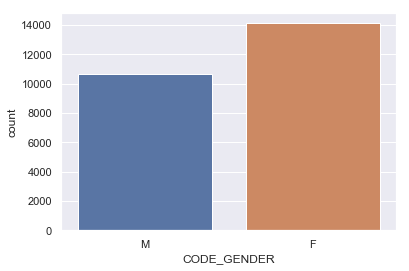

In [94]:
sns.countplot(defaulter_data['CODE_GENDER'])
plt.show()

From the above graph we can say that Female gender are having more defaulter as compare to Male Class

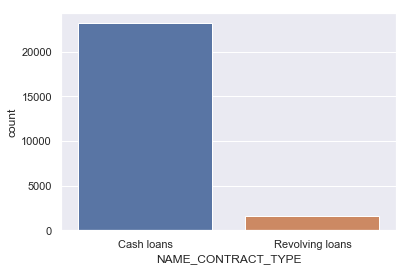

In [95]:
sns.countplot(defaulter_data['NAME_CONTRACT_TYPE'])
plt.show()

From the above plot, Cash Loans are more likely to be defaulters as compare to revolving loans

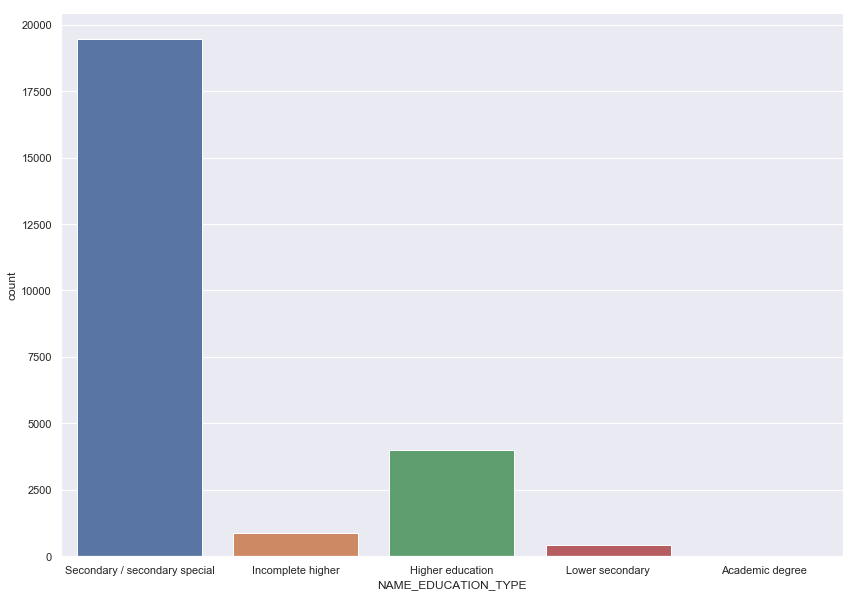

In [96]:
plt.figure(figsize=(14, 10))
sns.countplot(defaulter_data['NAME_EDUCATION_TYPE'])
plt.show()

From the above graph we can see that maximum defaulter have secondary education

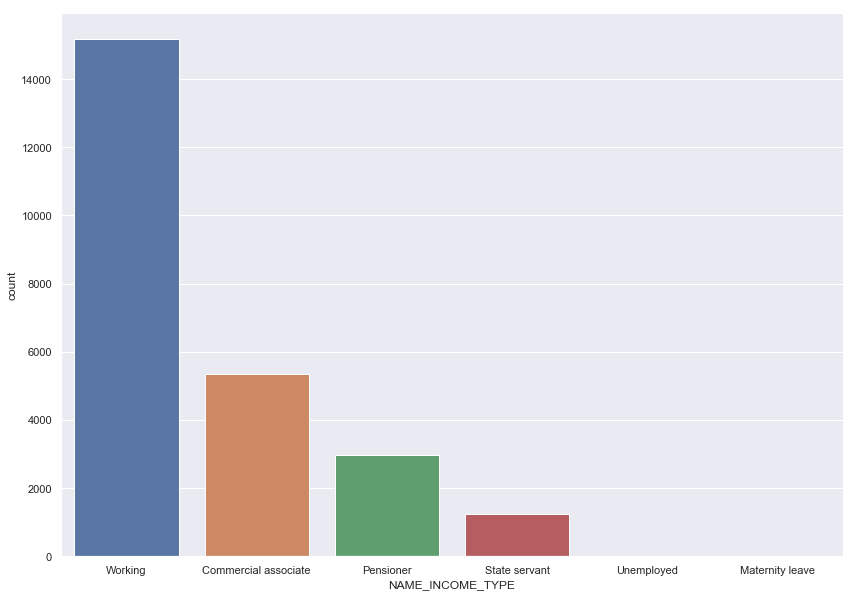

In [97]:
plt.figure(figsize=(14, 10))
sns.countplot(defaulter_data['NAME_INCOME_TYPE'])
plt.show()

Maiximum defaulter belongs to Working class

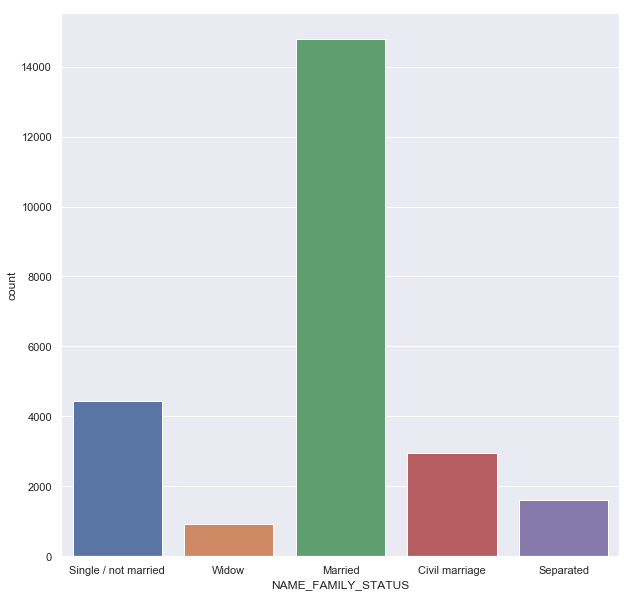

In [98]:
plt.figure(figsize=(10, 10))
sns.countplot(defaulter_data['NAME_FAMILY_STATUS'])
plt.show()

Married People are having maximum defaulter

In [99]:
defaulter_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,24755.000000,24755.0,24755.000000,2.475500e+04,2.475500e+04,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,...,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000
mean,277418.900626,1.0,0.463947,1.656428e+05,5.577170e+05,26496.035084,0.019128,-14884.777903,42386.550636,-4487.575197,...,0.005494,0.000444,0.000525,0.000566,0.005494,0.006665,0.028964,0.188528,0.215148,1.853080
std,102407.531763,0.0,0.757195,7.477203e+05,3.460330e+05,12442.624697,0.011904,4192.024146,119474.686772,3299.313835,...,0.073918,0.021075,0.022911,0.023775,0.077127,0.097206,0.186200,0.681629,0.593933,1.802396
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,0.000533,-25168.000000,-16069.000000,-22928.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189517.500000,1.0,0.000000,1.125000e+05,2.844000e+05,17370.000000,0.009630,-18036.000000,-2156.000000,-6646.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,276214.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25299.000000,0.018634,-14279.000000,-1034.000000,-4058.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366077.500000,1.0,1.000000,2.025000e+05,7.333155e+05,32998.500000,0.025164,-11397.000000,-378.500000,-1671.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,0.072508,-7678.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,17.000000,19.000000,22.000000


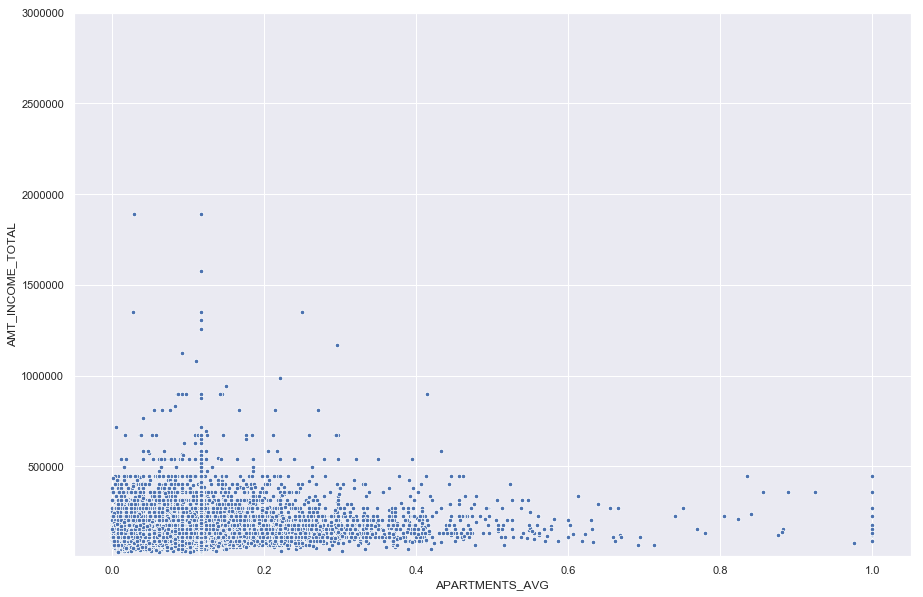

In [100]:
plt.figure(figsize=(15, 10))
sns.scatterplot(defaulter_data['APARTMENTS_AVG'],defaulter_data['AMT_INCOME_TOTAL'],s=20)
plt.ylim(5000,3000000)
plt.show()

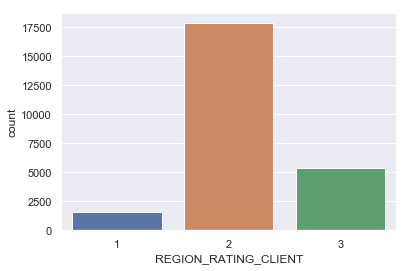

In [101]:
sns.countplot(defaulter_data['REGION_RATING_CLIENT'])
plt.show()

Clearly fromt the above plot, Defaulter mostly belongs from 2 region

### Analysis 2

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



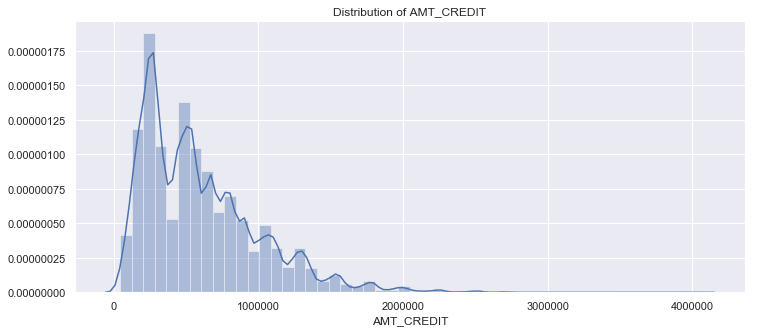

In [102]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_data["AMT_CREDIT"])
plt.show()

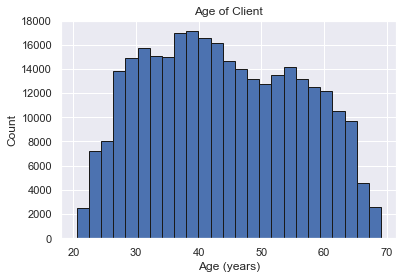

In [103]:
plt.hist(application_data['DAYS_BIRTH'].abs() / 365, edgecolor = 'k', bins = 25) 
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

The age distribution of the client

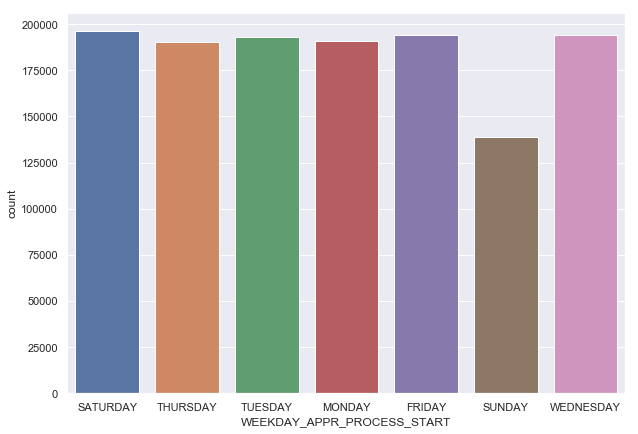

In [104]:
plt.figure(figsize=(10, 7))
sns.countplot(previous_data['WEEKDAY_APPR_PROCESS_START'])
plt.show()

SATURDAY is having maximum number of clients in previous application

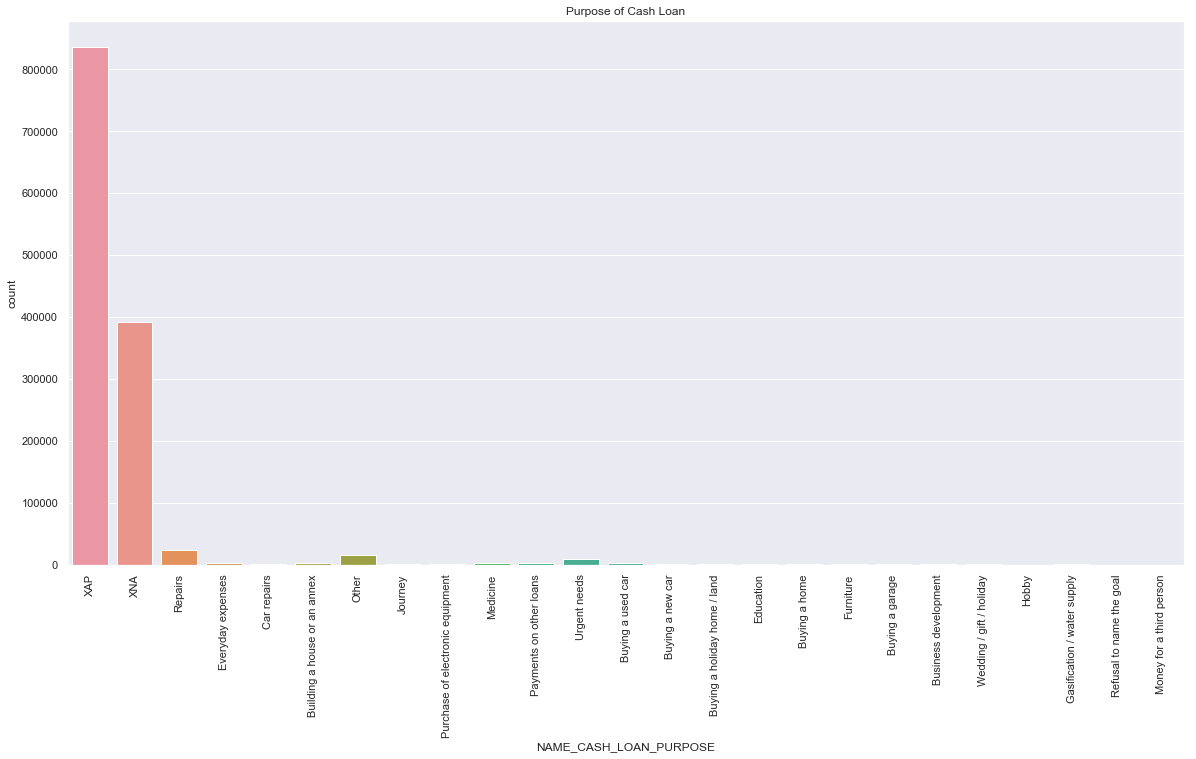

In [105]:
plt.figure(figsize=(20, 10))
sns.countplot(previous_data['NAME_CASH_LOAN_PURPOSE'])
plt.xticks(rotation=90)
plt.title('Purpose of Cash Loan')
plt.show()

Main Purpose
<li>XAP
<li>XNA

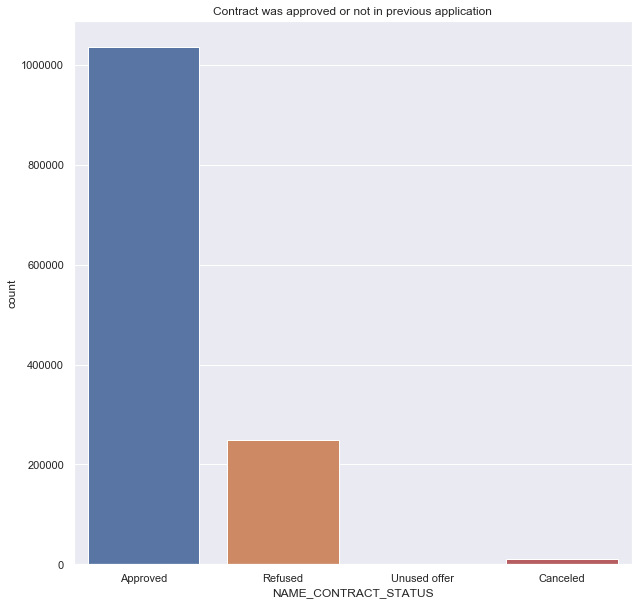

In [106]:
plt.figure(figsize=(10, 10))
sns.countplot(previous_data['NAME_CONTRACT_STATUS'])
plt.title('Contract was approved or not in previous application')
plt.show()

Contract was approved or not in previous application

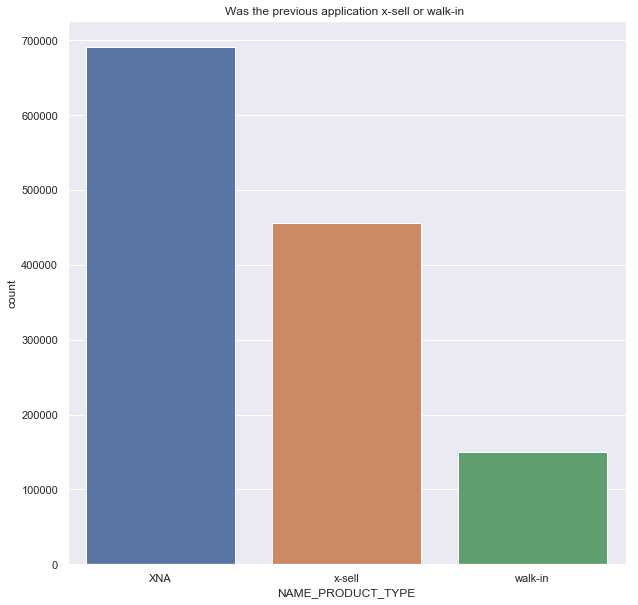

In [107]:
plt.figure(figsize=(10, 10))
sns.countplot(previous_data['NAME_PRODUCT_TYPE'])
plt.title('Was the previous application x-sell or walk-in ')
plt.show()

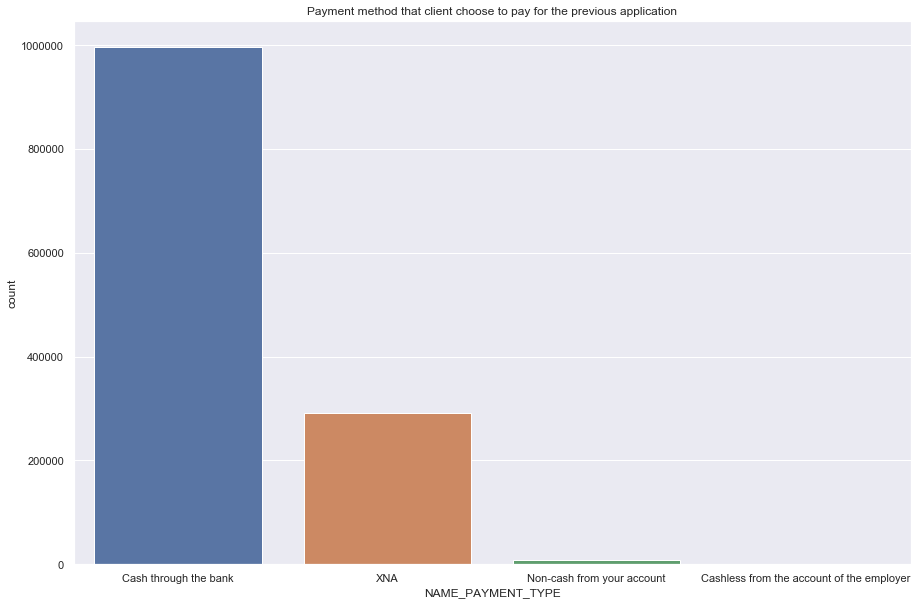

In [108]:
plt.figure(figsize=(15, 10))
sns.countplot(previous_data['NAME_PAYMENT_TYPE'])
plt.title('Payment method that client choose to pay for the previous application')
plt.show()

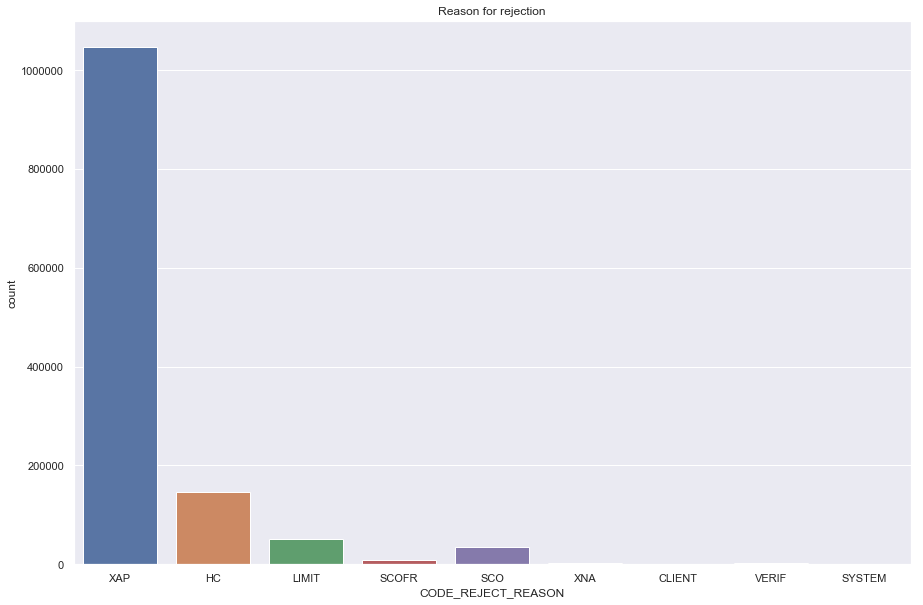

In [109]:
plt.figure(figsize=(15, 10))
sns.countplot(previous_data['CODE_REJECT_REASON'])
plt.title('Reason for rejection')
plt.show()

Payment method that client choose to pay for the previous application

In [110]:
temp = application_data["NAME_INCOME_TYPE"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_data["TARGET"][application_data["NAME_INCOME_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_data["TARGET"][application_data["NAME_INCOME_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Income sources of Applicant's in terms of loan is repayed or not  in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

fig.show() 

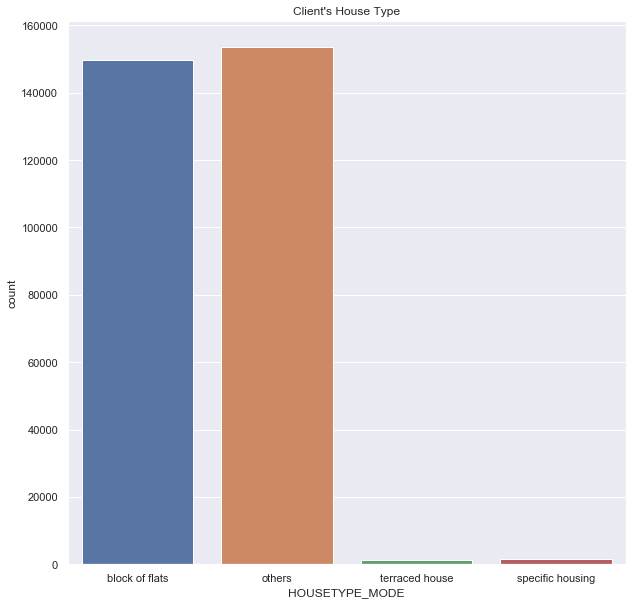

In [111]:
plt.figure(figsize=(10, 10))
sns.countplot(application_data['HOUSETYPE_MODE'])
plt.title("Client's House Type")
plt.show()

In [112]:
temp = previous_data["NAME_GOODS_CATEGORY"].value_counts()
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=(temp / temp.sum())*100,
        colorscale = 'Greens',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "What kind of goods did the client apply for in the previous application in % ",
    xaxis=dict(
        title='Name of the goods',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
fig.show() 

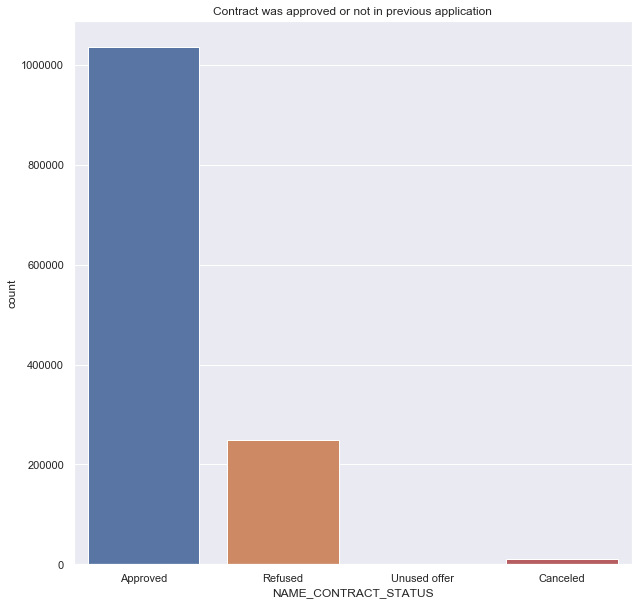

In [113]:
plt.figure(figsize=(10, 10))
sns.countplot(previous_data['NAME_CONTRACT_STATUS'])
plt.title('Contract was approved or not in previous application')
plt.show()

In [114]:
grade = pd.DataFrame(application_data['CODE_GENDER'].value_counts()).reset_index()
grade.columns = ['gender', 'count']
grade = grade.reset_index().drop('index', axis=1)

acc2 = application_data.groupby('CODE_GENDER').TARGET.sum()
acc2.columns = ['approved', 'count']
acc2 = acc2.reset_index()

acc2.sort_values('TARGET', ascending =False, inplace = True)
acc2.reset_index(inplace = True)
acc2.drop('index', axis = 1)

acc2['accepted'] = grade['count'] - acc2['TARGET']
acc2.drop('index', axis = 1)

trace1 = go.Bar(
    x=grade['gender'],
    y=acc2['TARGET'],
    name='NOT PAID'
)
trace2 = go.Bar(
    x=grade['gender'],
    y=acc2['accepted'],
    name='PAID'
)

data2 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Gender to Paid Ratio'
)

fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='stacked-bar')
fig.show() 

In [115]:
grade = pd.DataFrame(application_data['FLAG_OWN_CAR'].value_counts()).reset_index()
grade.columns = ['contract_type', 'count']
grade = grade.reset_index().drop('index', axis=1)

acc2 = application_data.groupby('FLAG_OWN_CAR').TARGET.sum()
acc2.columns = ['approved', 'count']
acc2 = acc2.reset_index()

acc2.sort_values('TARGET', ascending =False, inplace = True)
acc2.reset_index(inplace = True)
acc2.drop('index', axis = 1)

acc2['accepted'] = grade['count'] - acc2['TARGET']
acc2.drop('index', axis = 1)

trace1 = go.Bar(
    x=grade['contract_type'],
    y=acc2['TARGET'],
    name='NOT PAID'
)
trace2 = go.Bar(
    x=grade['contract_type'],
    y=acc2['accepted'],
    name='PAID'
)

data2 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Owning a CAR vs PAID'
)

fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='stacked-bar')
fig.show() 

In [116]:
grade = pd.DataFrame(application_data['NAME_TYPE_SUITE'].value_counts()).reset_index()
grade.columns = ['gender', 'count']
grade = grade.reset_index().drop('index', axis=1)

acc2 = application_data.groupby('NAME_TYPE_SUITE').TARGET.sum()
acc2.columns = ['approved', 'count']
acc2 = acc2.reset_index()

acc2.sort_values('TARGET', ascending =False, inplace = True)
acc2.reset_index(inplace = True)
acc2.drop('index', axis = 1)

acc2['accepted'] = grade['count'] - acc2['TARGET']
acc2.drop('index', axis = 1)

trace1 = go.Bar(
    x=grade['gender'],
    y=acc2['TARGET'],
    name='NOT PAID'
)
trace2 = go.Bar(
    x=grade['gender'],
    y=acc2['accepted'],
    name='PAID'
)

data2 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Type Of Suite vs PAID'
)

fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='stacked-bar')
fig.show() 

In [117]:
grade = pd.DataFrame(application_data['NAME_FAMILY_STATUS'].value_counts()).reset_index()
grade.columns = ['income', 'count']
grade = grade.reset_index().drop('index', axis=1)

acc2 = application_data.groupby('NAME_FAMILY_STATUS').TARGET.sum()
acc2.columns = ['approved', 'count']
acc2 = acc2.reset_index()

acc2.sort_values('TARGET', ascending =False, inplace = True)
acc2.reset_index(inplace = True)
acc2.drop('index', axis = 1)

acc2['accepted'] = grade['count'] - acc2['TARGET']
acc2.drop('index', axis = 1)

trace1 = go.Bar(
    x=grade['income'],
    y=acc2['accepted'],
    name='PAID',
    text='PAID',
    textposition = 'auto',
    marker=dict(
        color='rgba(50, 171, 96, 1.0)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
     x=grade['income'],
    y=acc2['TARGET'],
    text= 'NOT PAID',
    name = 'NOT PAID',
    textposition = 'auto',
    marker=dict(
        color='rgba(245, 246, 249)',
        line=dict(
            color='rgba(245, 246, 249)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1,trace2]

layout = go.Layout(
        title = 'Family status to Repaying Rate'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar-direct-labels')
fig.show() 


### Correlation

In [118]:
app_corr = application_data.corr()
df_app_train_corr_target = app_corr['TARGET'].sort_values()
print('positive correlation: \n{0}'.format(df_app_train_corr_target.tail(20)))
print('negative correlation: \n{0}'.format(df_app_train_corr_target.head(20)))

positive correlation: 
REG_REGION_NOT_WORK_REGION    0.006933
OBS_30_CNT_SOCIAL_CIRCLE      0.009136
CNT_FAM_MEMBERS               0.009280
AMT_REQ_CREDIT_BUREAU_YEAR    0.011998
CNT_CHILDREN                  0.019270
OWN_CAR_AGE                   0.020854
FLAG_WORK_PHONE               0.028605
DEF_60_CNT_SOCIAL_CIRCLE      0.031186
DEF_30_CNT_SOCIAL_CIRCLE      0.032141
LIVE_CITY_NOT_WORK_CITY       0.032375
DAYS_REGISTRATION             0.042129
FLAG_DOCUMENT_3               0.044519
REG_CITY_NOT_LIVE_CITY        0.044688
REG_CITY_NOT_WORK_CITY        0.050989
DAYS_ID_PUBLISH               0.051533
DAYS_LAST_PHONE_CHANGE        0.055632
REGION_RATING_CLIENT          0.059067
DAYS_BIRTH                    0.078575
TARGET                        1.000000
FLAG_MOBIL                         NaN
Name: TARGET, dtype: float64
negative correlation: 
EXT_SOURCE_2                 -0.160650
EXT_SOURCE_3                 -0.157504
EXT_SOURCE_1                 -0.099394
DAYS_EMPLOYED               

In [119]:
pos_corr_list = df_app_train_corr_target.head(10).index.values
neg_corr_list = df_app_train_corr_target[-2:-10:-1].index.values

print(pos_corr_list)
print(neg_corr_list)

['EXT_SOURCE_2' 'EXT_SOURCE_3' 'EXT_SOURCE_1' 'DAYS_EMPLOYED'
 'REGION_POPULATION_RELATIVE' 'AMT_CREDIT' 'FLOORSMAX_AVG'
 'FLAG_DOCUMENT_6' 'HOUR_APPR_PROCESS_START' 'FLAG_PHONE']
['TARGET' 'DAYS_BIRTH' 'REGION_RATING_CLIENT' 'DAYS_LAST_PHONE_CHANGE'
 'DAYS_ID_PUBLISH' 'REG_CITY_NOT_WORK_CITY' 'REG_CITY_NOT_LIVE_CITY'
 'FLAG_DOCUMENT_3']


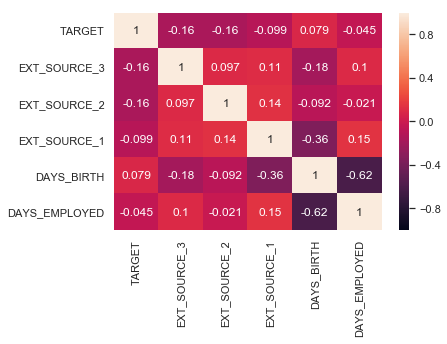

In [120]:
imp_feature = application_data[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED']] 
imp_feature_corr = imp_feature.corr()
sns.heatmap(imp_feature_corr,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

Top 5 Correlated fields